In [2]:
import cfGPR

import numpy as np
import astropy.units as u
import astropy.constants as c
import matplotlib.pyplot as plt
import scipy.optimize as opt

add in penalty to chisq for out of bounds params

In [1]:
# Load in exposure
GP = cfGPR.CurlFreeGPR()
GP.load_fits('folio2')
GP.extract_data(465)
GP.sigma_clip()
GP.split_data(train_size=0.50, test_size=0.50)

NameError: name 'cfGPR' is not defined

In [77]:
# Optimize kernel parameters over the validation set.
GP.correlation_fit()
GP.optimize()

In [78]:
# Fit the data and predict on the test set.
GP.fit(GP.theta)
GP.predict(GP.Xtest)
GP.get_chisq(GP.Ytest, GP.fbar_s, GP.Etest)

{'sigma_s': 103.22017098268992, 'sigma_x': 0.1709823892942634, 'sigma_y': 0.1867657764375329, 'phi': -0.02522059270031203, 'sigma_w': 4.473886785241184}
537524.1558378672
47078.30689532361
Log Marginal Likelihood: 47078.30689532361
chisq: 537524.1558378672
RMSx, RMSy, noise: 17.181008277388525 14.975729002404103 2.3342588294342193


/home/fortino/DESworkspace/cfGPR.py:1020: RuntimeWarning: invalid value encountered in true_divide
  sumxw = np.where( sumw > minWeight, sumxw / sumw, noData)
/home/fortino/DESworkspace/cfGPR.py:1021: RuntimeWarning: invalid value encountered in true_divide
  sumyw = np.where( sumw > minWeight, sumyw / sumw, noData)
/home/fortino/DESworkspace/cfGPR.py:1022: RuntimeWarning: divide by zero encountered in true_divide
  sumw = np.where( sumw > minWeight, 1./sumw, noData)
/home/fortino/DESworkspace/cfGPR.py:1023: RuntimeWarning: invalid value encountered in greater
  rmsx = np.std(sumxw[sumw>0.])
/home/fortino/DESworkspace/cfGPR.py:1024: RuntimeWarning: invalid value encountered in greater
  rmsy = np.std(sumyw[sumw>0.])
/home/fortino/DESworkspace/cfGPR.py:1025: RuntimeWarning: invalid value encountered in greater
  print('RMSx, RMSy, noise:', rmsx, rmsy, np.sqrt(np.mean(sumw[sumw>0.])))
/home/fortino/DESworkspace/cfGPR.py:1033: RuntimeWarning: invalid value encountered in less
  useful = n

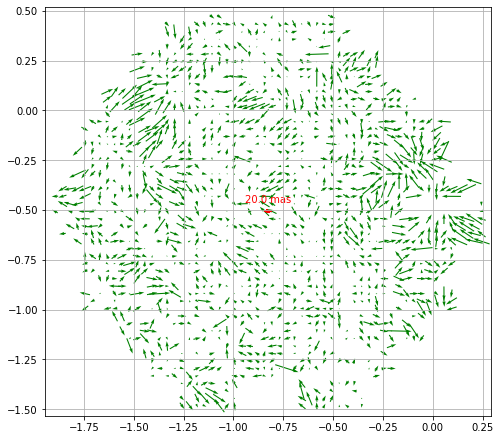

RMSx, RMSy, noise: 12.158038797485586 11.712728637088231 2.3342588294342193


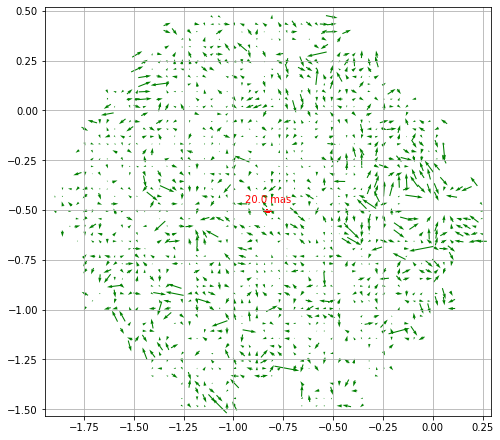

RMSx, RMSy, noise: 16.518270264533918 13.726880864714582 1.4196180270011165


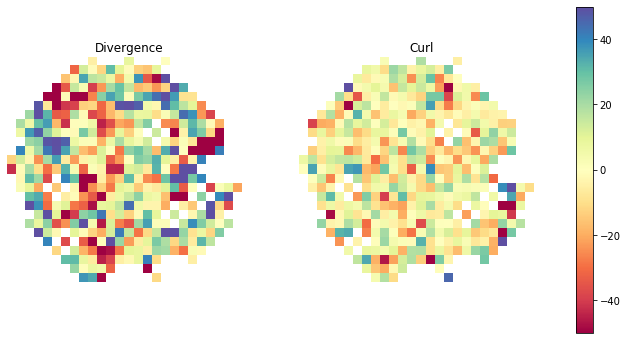

RMS of div: 31.95; curl: 17.76
RMSx, RMSy, noise: 11.980595570973948 10.509970092436982 1.4196180270011165


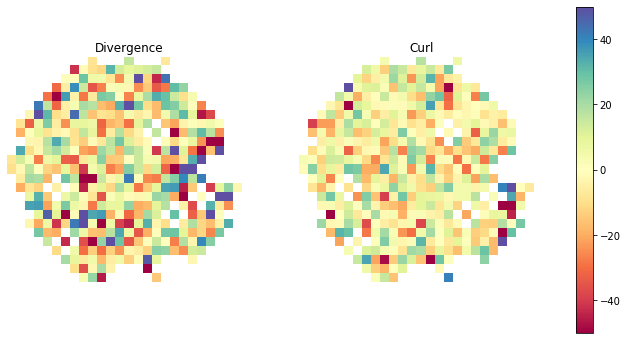

RMS of div: 25.61; curl: 17.50


/home/fortino/DESworkspace/cfGPR.py:1093: RuntimeWarning: invalid value encountered in true_divide
  logr = np.histogram(logdr, bins=bins, range=hrange, weights=logdr)[0] / counts
/home/fortino/DESworkspace/cfGPR.py:1098: RuntimeWarning: invalid value encountered in true_divide
  xiplus = np.histogram(logdr, bins=bins, range=hrange, weights=vvec)[0]/counts
/home/fortino/DESworkspace/cfGPR.py:1100: RuntimeWarning: invalid value encountered in true_divide
  xiz2 = np.histogram(logdr, bins=bins, range=hrange, weights=vvec)[0]/counts
/home/fortino/DESworkspace/cfGPR.py:1109: RuntimeWarning: invalid value encountered in true_divide
  ximinus = np.histogram(logdr, bins=bins, range=hrange, weights=vvec)[0]/counts


Mean of first 30 points (Emode (Observed)):  511.7446038721097
Mean of first 30 points (Bmode (Observed)):  -13.912551064094425
Mean of first 30 points (Emode (GPR Applied)):  234.7494733233669
Mean of first 30 points (Bmode (GPR Applied)):  -3.387658140081187
Ratio of E modes: 2.1799606049261824
Ratio of B modes: 4.10683442331079


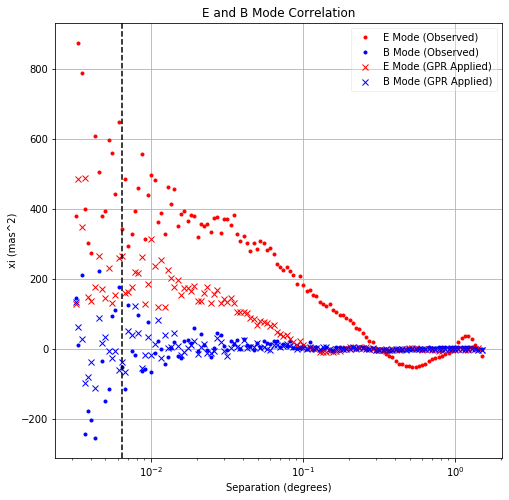

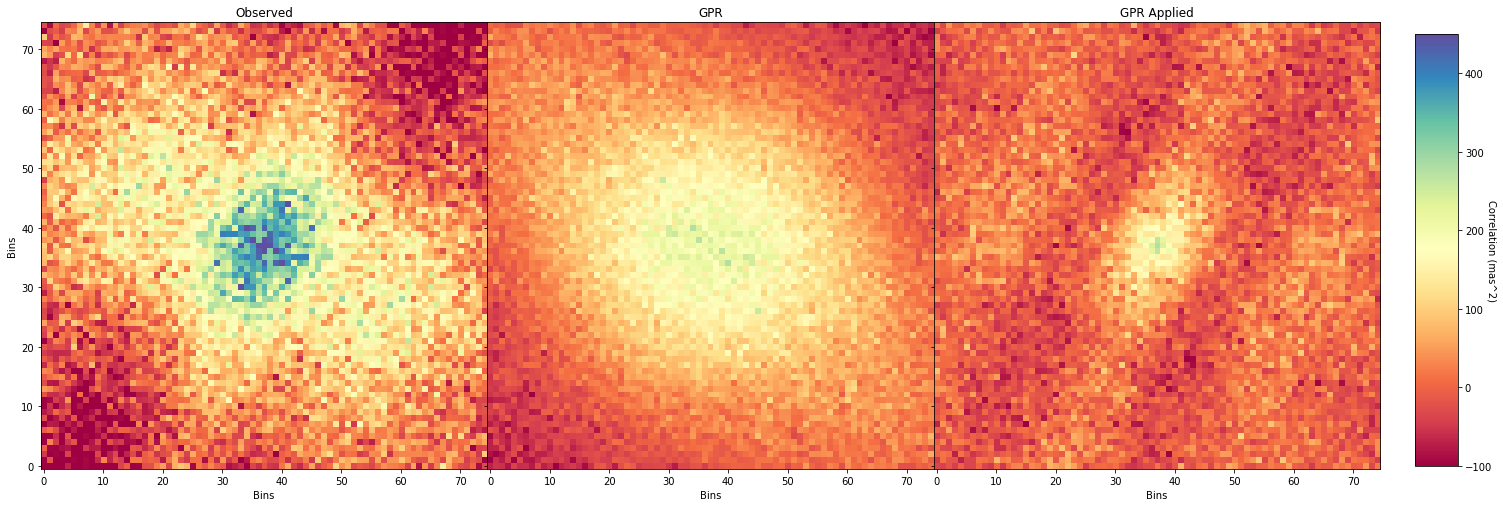

In [79]:
# Make various plots for the prediction on the test set to see how good things look at this stage.
print(GP.theta)
print(GP.chisq)
print(GP.nLML)
GP.summarize()

In [80]:
# Go back and repredict with the first model but on the entire X data.
# This means that fbar_s, the output of the model, is the same length as the original data set.
GP.predict(GP.X, full=True)
GP.get_chisq(GP.Y, GP.fbar_s, GP.E)

In [81]:
GP2 = cfGPR.CurlFreeGPR()
GP2.X = GP.X
GP2.Y = GP.Y - GP.fbar_s
GP2.E = GP.E
GP2.split_data(train_size=0.50, test_size=0.50)

# If GP2 is split the same way as GP is, then these assertion statements should pass.
assert np.all(GP2.Xtrain == GP.Xtrain)
assert np.all(GP2.Xvalid == GP.Xvalid)
assert np.all(GP2.Xtest == GP.Xtest)

assert np.all(GP2.Etrain == GP.Etrain)
assert np.all(GP2.Evalid == GP.Evalid)
assert np.all(GP2.Etest == GP.Etest)

In [82]:
GP2.correlation_fit()
GP2.optimize()

In [83]:
GP2.fit(GP2.theta)
GP2.predict(GP2.Xtest)
GP2.get_chisq(GP2.Ytest, GP2.fbar_s, GP2.Etest)

{'sigma_s': 8182.998646633703, 'sigma_x': 0.0354739812661009, 'sigma_y': 0.03742217807685781, 'phi': -1.7234609705903283, 'sigma_w': 1.2639858094230538}
457076.5725731718
136782.80266311916
Log Marginal Likelihood: 136782.80266311916
chisq: 457076.5725731718
RMSx, RMSy, noise: 12.15803879748559 11.712728637088231 2.3342588294342193


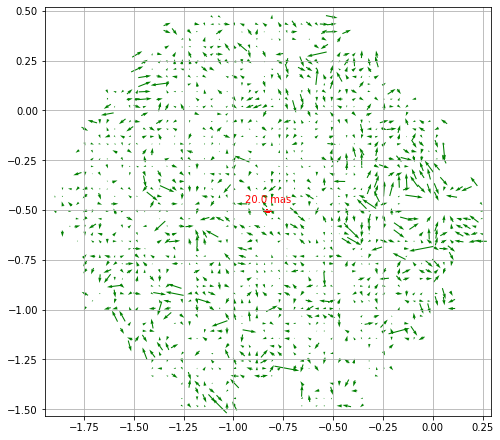

RMSx, RMSy, noise: 11.540405128352694 9.592179821973616 2.3342588294342193


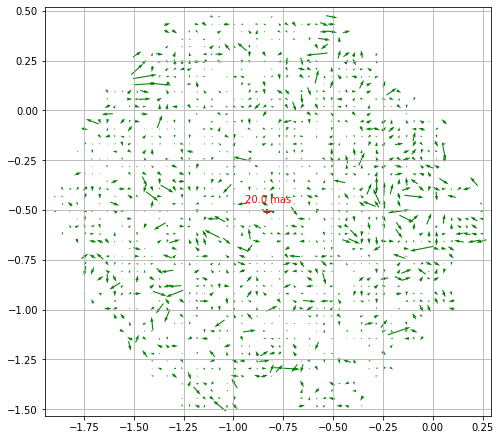

RMSx, RMSy, noise: 11.980595570973954 10.509970092436982 1.4196180270011165


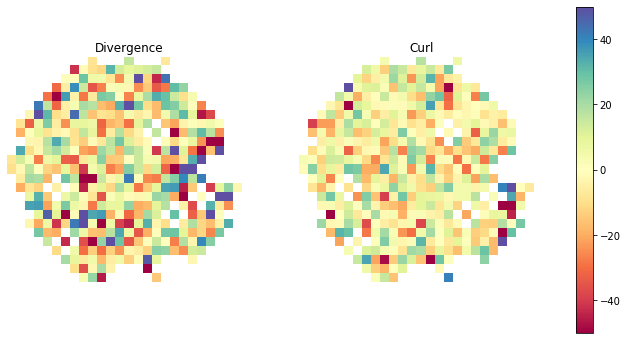

RMS of div: 25.61; curl: 17.50
RMSx, RMSy, noise: 11.220592698855548 8.580320716730089 1.4196180270011165


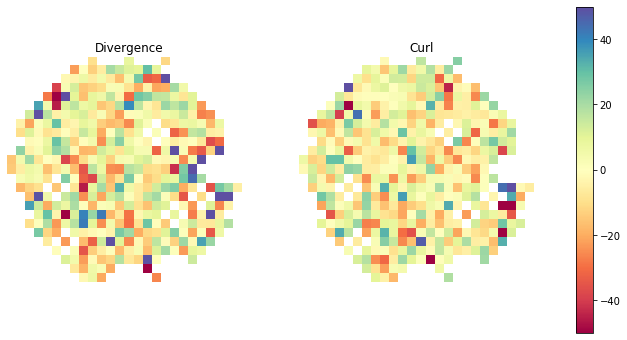

RMS of div: 19.40; curl: 15.89
Mean of first 30 points (Emode (Observed)):  234.7494733233672
Mean of first 30 points (Bmode (Observed)):  -3.3876581400812253
Mean of first 30 points (Emode (GPR Applied)):  132.36934297944705
Mean of first 30 points (Bmode (GPR Applied)):  12.485319460998662
Ratio of E modes: 1.773442913891449
Ratio of B modes: -0.271331314401967


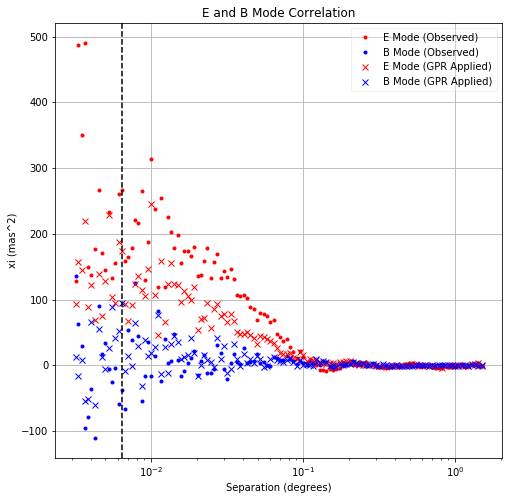

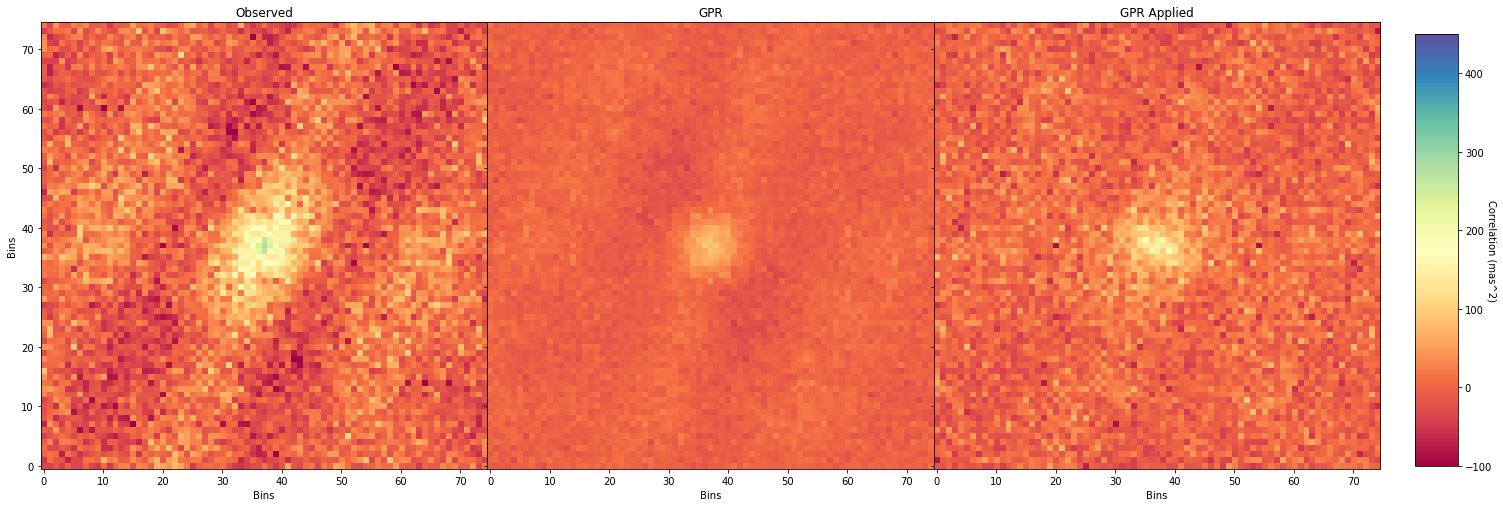

In [84]:
print(GP2.theta)
print(GP2.chisq)
print(GP2.nLML)
GP2.summarize()

In [90]:
print(GP.theta)

{'sigma_s': 103.22017098268992, 'sigma_x': 0.1709823892942634, 'sigma_y': 0.1867657764375329, 'phi': 3.116372060889481, 'sigma_w': 4.473886785241184}
